In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from itertools import product
current_dir = os.getcwd()
parallel_folder = os.path.abspath(os.path.join(current_dir, '../Fit_and_Predict'))
sys.path.append(parallel_folder)

from config import get_model_ds_kwargs,get_dataset_kwargs

/Users/leif/miniforge3/envs/hnam/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
DATASET = 'Walmart' # Favorita | Walmart
causals = get_model_ds_kwargs('HNAM', DATASET)['causal']

In [3]:
data = pd.read_pickle(f'../Processed/{DATASET}/{DATASET.lower()}_data.pkl')

data_all = pd.read_pickle(f'{DATASET}/hnam_all.pkl')
data_pred = pd.read_pickle(f'{DATASET}/hnam.pkl')

data_tft = pd.read_pickle(f'{DATASET}/tft.pkl')

ttod = pd.read_pickle(f'../Processed/{DATASET}/{DATASET.lower()}_ttod.pkl')
scaling = pd.read_pickle(f'../Processed/{DATASET}/{DATASET.lower()}_scaling.pkl')

data_all['pred_date'] = data_all['pred_idx'].map(ttod)
data_pred['pred_date'] = data_pred['pred_idx'].map(ttod)
data_tft['pred_date'] = data_tft['pred_idx'].map(ttod)


data_pred = data_pred.merge(data,left_on=['time_series','pred_idx'],right_on=['time_series','time_idx'],how='left').drop('time_idx_y',axis=1).rename(columns={'time_idx_x':'time_idx'})
data_all = data_all.merge(data,left_on=['time_series','pred_idx'],right_on=['time_series','time_idx'],how='left').drop('time_idx_y',axis=1).rename(columns={'time_idx_x':'time_idx'})

In [4]:
data_tft['mean'] = data_tft['time_series'].map(scaling['mean'])
data_tft['std'] = data_tft['time_series'].map(scaling['std'])
data_tft['pred_scaled'] = (data_tft['pred']  - data_tft['mean'])  /  data_tft['std']
data_tft['true_scaled'] = (data_tft['true']  - data_tft['mean']) /  data_tft['std']
data_tft['smape'] = 2 * np.abs(data_tft['true'] - data_tft['pred']) / (np.abs(data_tft['true']) + np.abs(data_tft['pred']))
data_tft['mape'] = np.abs(data_tft['true'] - data_tft['pred']) / np.abs(data_tft['true'])
data_tft['smae'] = np.abs(data_tft['true_scaled'] - data_tft['pred_scaled'])
data_tft['srmse'] = (data_tft['true_scaled'] - data_tft['pred_scaled']) ** 2
# --------------------------------------------------------------------------------------------------------------------------------
data_pred['mean'] = data_pred['time_series'].map(scaling['mean'])
data_pred['std'] = data_pred['time_series'].map(scaling['std'])
data_pred['pred_scaled'] = (data_pred['pred']  - data_pred['mean'])  /  data_pred['std']
data_pred['true_scaled'] = (data_pred['true']  - data_pred['mean']) /  data_pred['std']
data_pred['smape'] = 2 * np.abs(data_pred['true'] - data_pred['pred']) / (np.abs(data_pred['true']) + np.abs(data_pred['pred']))
data_pred['mape'] = np.abs(data_pred['true'] - data_pred['pred']) / np.abs(data_pred['true'])
data_pred['smae'] = np.abs(data_pred['true_scaled'] - data_pred['pred_scaled'])
data_pred['srmse'] = (data_pred['true_scaled'] - data_pred['pred_scaled']) ** 2
# --------------------------------------------------------------------------------------------------------------------------------
data_all['mean'] = data_all['time_series'].map(scaling['mean'])
data_all['std'] = data_all['time_series'].map(scaling['std'])
data_all['pred_scaled'] = (data_all['pred']  - data_all['mean'])  /  data_all['std']
data_all['true_scaled'] = (data_all['true']  - data_all['mean']) /  data_all['std']
data_all['smape'] = 2 * np.abs(data_all['true'] - data_all['pred']) / (np.abs(data_all['true']) + np.abs(data_all['pred']))
data_all['mape'] = np.abs(data_all['true'] - data_all['pred']) / np.abs(data_all['true'])
data_all['smae'] = np.abs(data_all['true_scaled'] - data_all['pred_scaled'])
data_all['srmse'] = (data_all['true_scaled'] - data_all['pred_scaled']) ** 2
# --------------------------------------------------------------------------------------------------------------------------------
for c in causals:
    data_all[f'relative_{c}'] = (data_all[f'effect_{c}'] / np.abs(data_all['effect_level_pred']))
    data_all[f'scaled_{c}'] = data_all[f'effect_{c}'] / data_all['std']

    data_pred[f'relative_{c}'] = (data_pred[f'effect_{c}'] / data_pred['effect_level_pred'])
    data_pred[f'scaled_{c}'] = data_pred[f'effect_{c}'] / data_pred['std']

## Global Insights

In [5]:
# Get Categoricals
if DATASET == 'Favorita':
    data_all = data_all.rename(columns={'type':'cat'})
    data_pred = data_pred.rename(columns={'type':'cat'})
# --------------------------------------------------------------------------------------------------------------------------------
elif DATASET == 'Walmart':
    data_all['cat'] = data_all['time_series'].str.split('_').str[0]
    data_pred['cat'] = data_pred['time_series'].str.split('_').str[0]
# --------------------------------------------------------------------------------------------------------------------------------

/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/876766872.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p = data_pred.groupby([c, 'time_series', 'cat'])[f'scaled_{c}'].median()
/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/876766872.py:52: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(
/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/876766872.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/876766872.py:75: UserWarning: set_ticklabels() should only be used wit

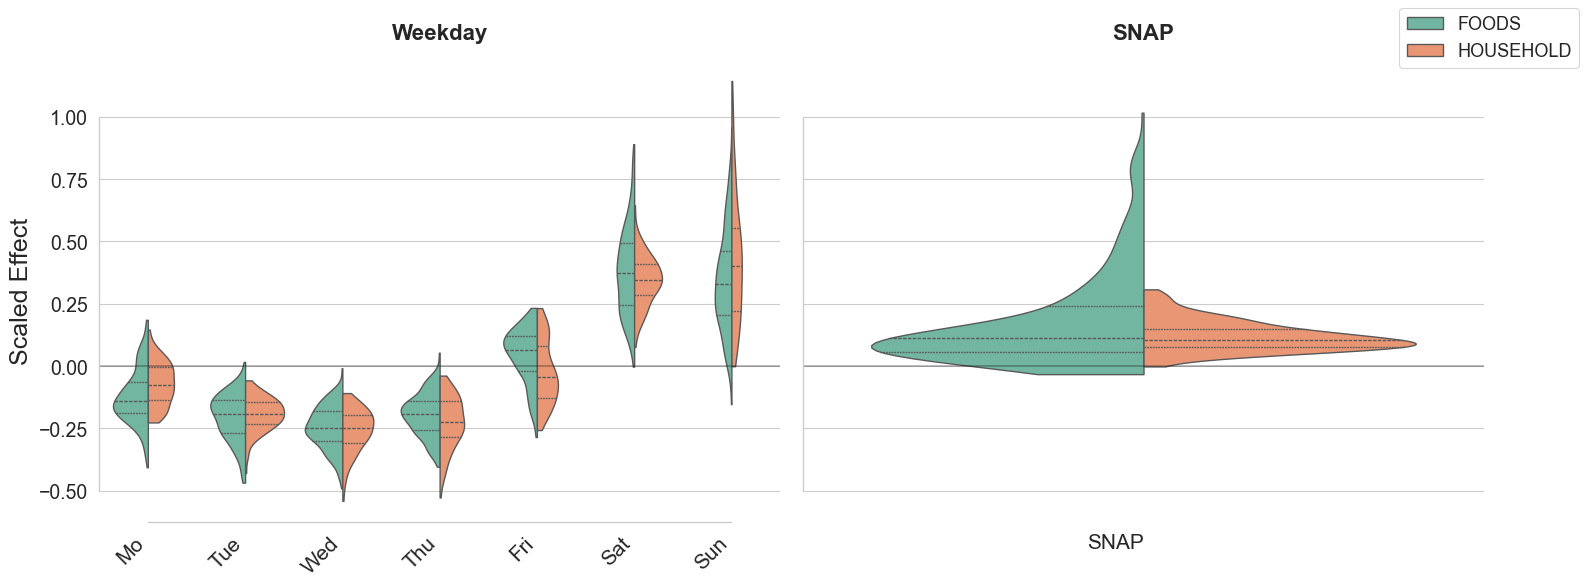

In [6]:
sns.set_theme(style='whitegrid', context='paper', font_scale=1.6)
fs_title = 16
fs_xticks = 15
fs_ylabel = 18
fs_xlabel = 18
fs_legend = 13

# Define the dataset and the covariates to plot based on the dataset
if DATASET == 'Walmart':
    plot_causals = ['weekday','snap']
elif DATASET == 'Favorita':
    plot_causals = ['onpromotion', 'national_holiday']

# Determine the number of plots
num_plots = len(plot_causals)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(8 * num_plots, 6), sharey=True)


# If there's only one plot, put the single axis into a list for consistency
if num_plots == 1:
    axes = [axes]

# Initialize a variable to store legend handles and labels
legend_handles = []
legend_labels = []

# Loop over each covariate and its corresponding axis
for ax, c in zip(axes, plot_causals):
    # Group the data and calculate the median
    
    p = data_pred.groupby([c, 'time_series', 'cat'])[f'scaled_{c}'].median()
    
    # Drop the '-' category if it exists
    if '-' in p.index:
        p = p.drop('-')
    
    # Reshape the data for plotting
    p = p.unstack().T
    p = p.melt(ignore_index=False).reset_index()
    p[c] = p[c].astype(str)
    # p = p[p[c].str.contains(r'-\d+$') == False]
    p = p[p['cat'] != "HOBBIES"]
    
    # Create the violin plot on the current axis
    palette = sns.color_palette("Set2")

    if c == 'national_holiday':
        p = p[p['national_holiday'].isin(['Carnaval','Navidad'])]
    
    sns.violinplot(
        data=p,
        x=c,
        y='value',
        hue='cat',
        palette=palette,
        split=True,
        inner='quartile',
        linewidth=1,
        cut=0,
        ax=ax
    )


    title = {'onpromotion':'Promotion','national_holiday':'National Holiday','snap':'SNAP','weekday':'Weekday'}.get(c,c)
    ax.set_title(title, fontsize=fs_title, fontweight='bold', pad=15)

    # Inrease x tick size
    # Customize the x-tick labels
    if p[c].nunique() > 3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    if c == 'weekday':
        ax.set_xticklabels(
            ['Mo', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            rotation=45,
            ha='right'
        )
    
    if c == 'snap':
        ax.set_xticks([0])
        ax.set_xticklabels(['SNAP'])

    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=fs_xticks)
    xlim1 = ax.get_xlim()[0]
    xlim2 = ax.get_xlim()[1]

    ax.hlines(0,xlim1,xlim2, colors='black',alpha=0.3)
    ax.set_xlim(xlim1,xlim2)
    
    # Label the axes
    ax.set_xlabel('')
    # ax.set_ylabel('Scaled Effect')
    ax.set_ylabel('Scaled Effect', fontsize=fs_ylabel)
    
    # Collect legend handles and labels from the first plot
    if not legend_handles:
        handles, labels = ax.get_legend_handles_labels()
        legend_handles = handles
        legend_labels = labels
    
    # Remove individual legends to avoid duplication
    ax.get_legend().remove()

# Add a shared legend to the figure
if legend_handles and legend_labels:
    fig.legend(
        legend_handles,
        legend_labels,
        title=None,
        fontsize = fs_legend,
        loc='upper right',
        frameon=True,
        facecolor='white'
    )

# Remove the y-label from all but the first subplot to avoid repetition
for ax in axes[1:]:
    ax.set_ylabel('')


# Remove the top and right spines for a cleaner look
sns.despine(trim=True)

# Adjust the layout to prevent overlapping elements
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on the right for the legend

# Save the figure in high resolution
plt.savefig(f'figures/global_dataset/{DATASET.lower()}_global_dataset.tiff', dpi=350, bbox_inches='tight',pil_kwargs={"compression": "tiff_lzw"})
plt.show()


In [7]:
if DATASET == 'Favorita':
    promo_effect = data_all[data_all['onpromotion']=='True']['effect_onpromotion'].gt(0).mean()
    num_update = data_all[data_all['onpromotion']=='True']['effect_onpromotion'].mean()
    rel_promo_effect = data_all[data_all['onpromotion']=='True']['relative_onpromotion'].mean()
    print('Pct of positive promo effect', promo_effect)
    print('Mean effect of promo', num_update)
    print('Relative effect of promo', rel_promo_effect)

elif DATASET == 'Walmart':
    promo_effect = data_all[data_all['snap']=='x']['effect_snap'].gt(0).mean()
    num_update = data_all[data_all['snap']=='x']['effect_snap'].mean()
    rel_promo_effect = data_all[data_all['snap']=='x']['relative_snap'].mean()
    print('Pct of positive promo effect', promo_effect)
    print('Mean effect of promo', num_update)
    print('Relative effect of promo', rel_promo_effect)


Pct of positive promo effect 0.9352839352364458
Mean effect of promo 1.4592907
Relative effect of promo 0.110840105


### Product Insights

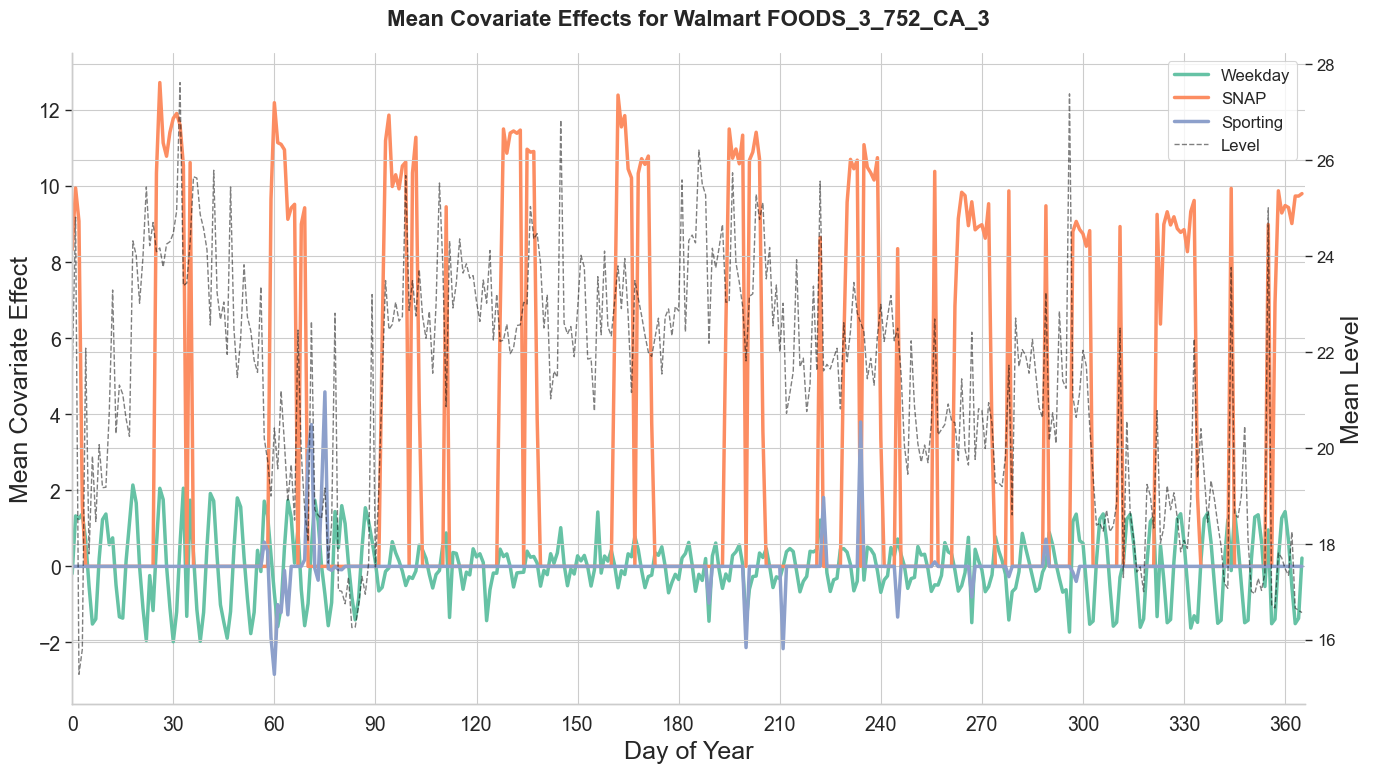

In [8]:
sns.set_theme(style='whitegrid', context='paper', font_scale=1.6)
fs_title = 16
fs_xticks = 15
fs_ylabel = 18
fs_xlabel = 18
fs_legend = 13

promo_cov = {"Walmart":"snap","Favorita":"onpromotion"}.get(DATASET)
promo_flag = {"Walmart":'x',"Favorita":"True"}.get(DATASET)

# Retrieve the first three categorical variables
categorical_vars = get_dataset_kwargs(DATASET)['time_varying_known_categoricals'][:3]

ts_sorted = data_all.groupby('time_series')['srmse'].mean().sort_values().index
selected_ts = data_all.groupby(['time_series'])['effect_'+promo_cov].sum().sort_values().index[-1]

data_i = data_all[data_all['time_series'] == selected_ts].query('h==7').query('dayofyear!=366')

# Initialize the plot
fig = plt.figure(figsize=(14, 8))

# Choose a color palette with distinct colors for each covariate
palette = sns.color_palette("Set2", n_colors=len(categorical_vars))


# Loop over each of the first three categorical variables to plot their Mean effects
for idx, (c, color) in enumerate(zip(categorical_vars, palette)):
    # Calculate the Mean (50th percentile) for each day of the year
    Mean_effect = data_i.groupby('dayofyear')[f'effect_{c}'].mean().reset_index()
    # Plot the Mean effect line

    label = {'snap':'SNAP','onpromotion':'Promotion','national_holiday':'National Holiday',
             'regional_holiday':'Regional Holiday',
             'local_holiday':'Local Holiday',
             'weekday':'Weekday'}.get(c,c)
             
    sns.lineplot(
        data=Mean_effect,
        x='dayofyear',
        y=f'effect_{c}',
        label=label,
        color=color,
        linewidth=2.5
    )

Mean_level = data_i.groupby('dayofyear')[f'effect_level_pred'].mean().reset_index()

primary_y_axis = plt.gca()
primary_y_axis.set_ylabel('Mean Covariate Effect', fontsize=fs_ylabel)
second_y_axis = primary_y_axis.twinx()
second_y_axis.set_ylabel('Mean Level', fontsize=fs_ylabel)
primary_y_axis.set_xlabel('Day of Year', fontsize=fs_xlabel)

sns.lineplot(
    data=Mean_level,
    x='dayofyear',
    y=f'effect_level_pred',
    label='Level',
    color='black',
    linewidth=1,
    alpha=0.5,
    linestyle='--',
    ax = second_y_axis
)



# Customize the title
plt.title(f'Mean Covariate Effects for {DATASET.capitalize()} {selected_ts}', fontsize=fs_title, fontweight='bold', pad=20)


handles1, labels1 = primary_y_axis.get_legend_handles_labels()
handles2, labels2 = second_y_axis.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2



# Remove individual legends to prevent duplication
primary_y_axis.get_legend().remove()
second_y_axis.get_legend().remove()

plt.legend(
    handles=handles,
    labels=labels,
    title=None,  # You can customize the title as needed
    title_fontsize=None,
    fontsize=12,
    loc='upper right',  # Position the legend as desired
    frameon=True,
    facecolor='white',
)

plt.xlim(1, 366)
plt.xticks(
    ticks=range(0, 367, 30),
    labels=[str(day) for day in range(0, 367, 30)],
    rotation=45,
    ha='right'
)

# Enhance y-axis ticks for clarity
plt.yticks(fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the figure in high resolution for publication
plt.savefig(f'figures/global_time_series/{DATASET.lower()}_global_time_series.tiff', dpi=350, bbox_inches='tight',pil_kwargs={"compression": "tiff_lzw"})


# Display the plot
plt.show()


### Predictions Insights

In [9]:
scaled_cols = data_pred.columns[data_pred.columns.str.contains('scaled')]
scaled_cols = scaled_cols.drop('scaled_weekday')
scaled_cols = data_pred.columns[data_pred.columns.str.contains('effect')]
effect_cols = scaled_cols.drop('effect_weekday')
relative_cols = data_pred.columns[data_pred.columns.str.contains('relative')]
relative_cols = relative_cols.drop('relative_weekday')


sel_cols = scaled_cols
many_effects = data_pred[data_pred[sel_cols].ne(0).sum(axis=1)==4].set_index(['time_idx','time_series'])[sel_cols].abs().groupby(['time_idx','time_series']).sum().sum(axis=1).sort_values().index[-1]

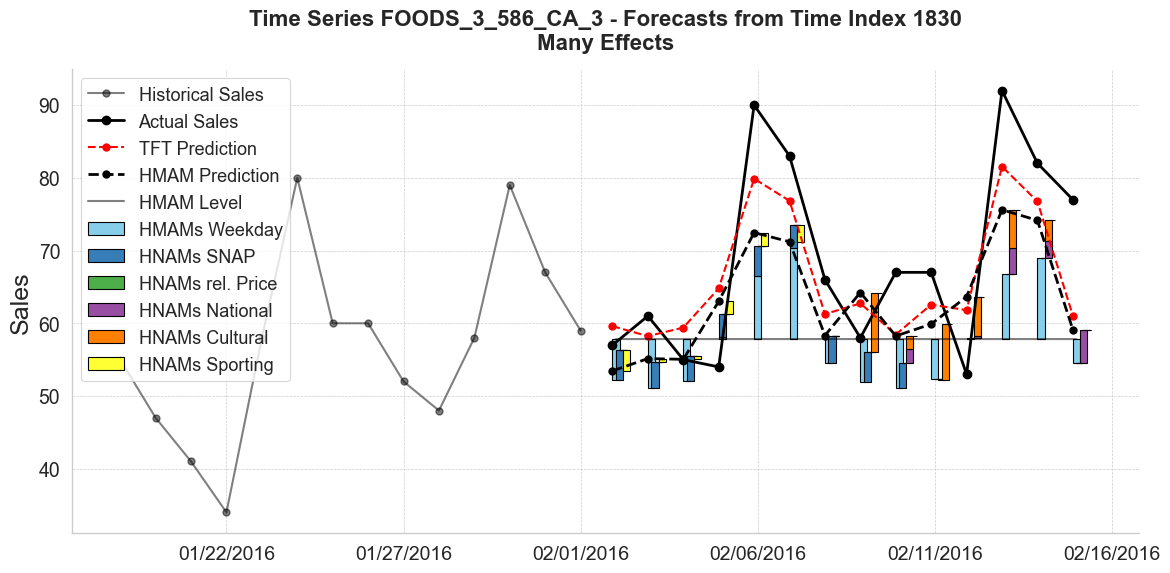

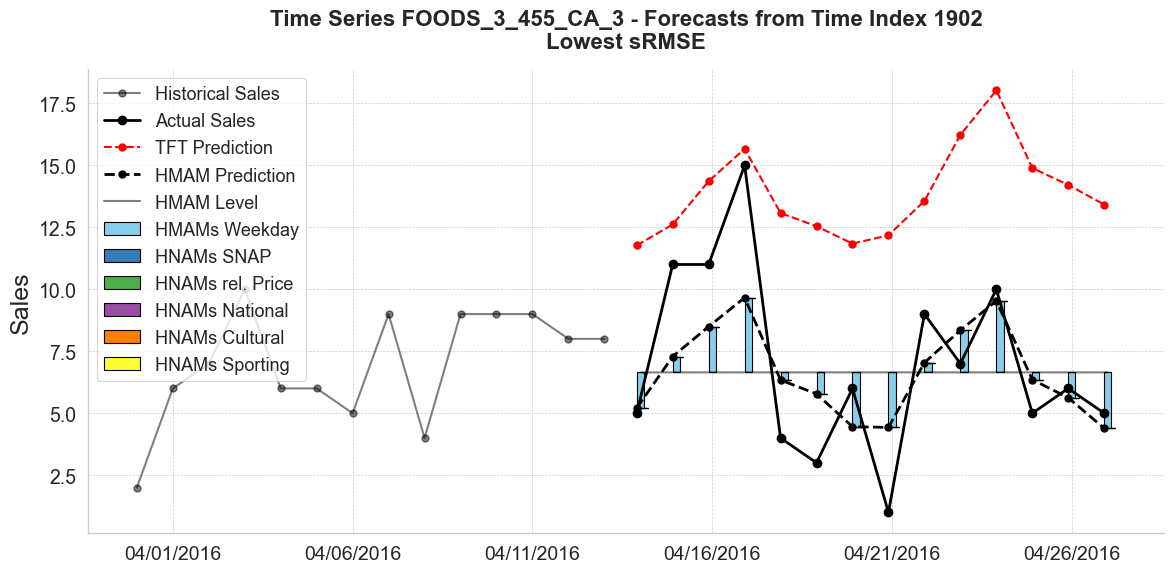

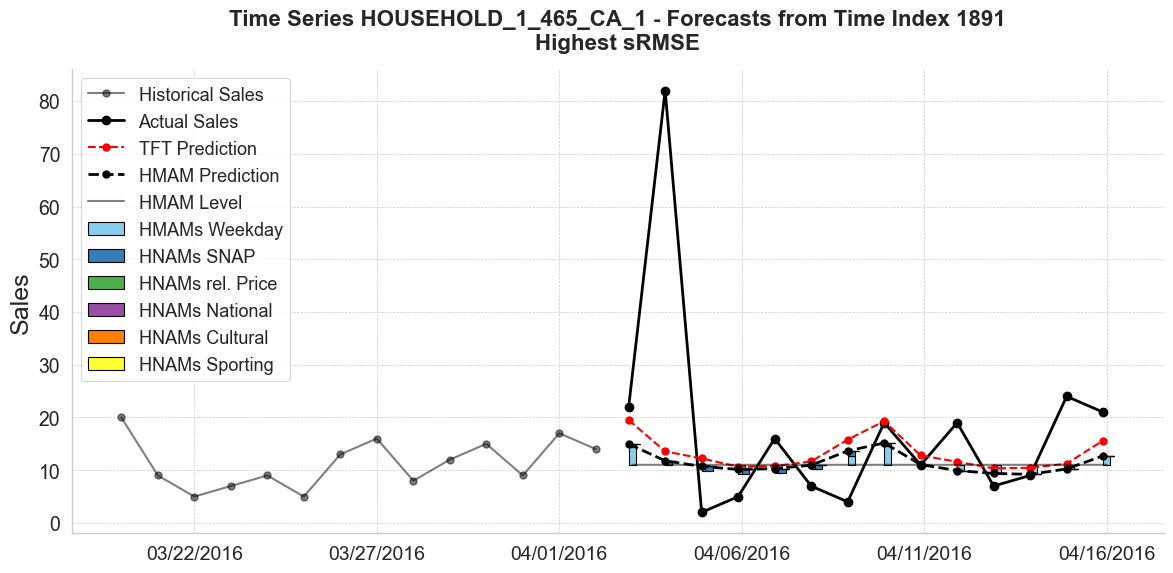

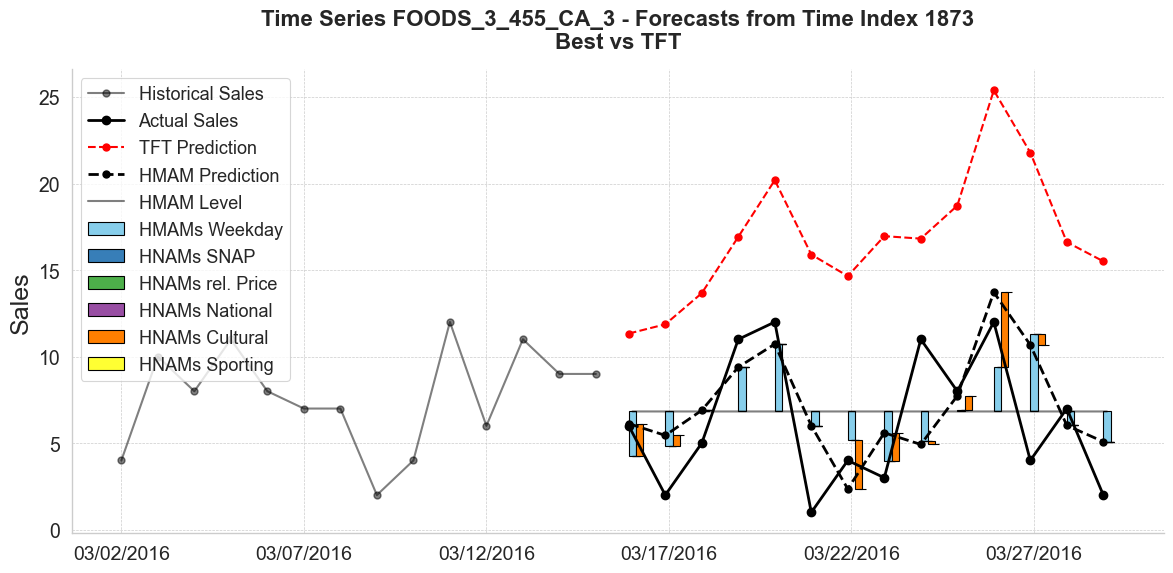

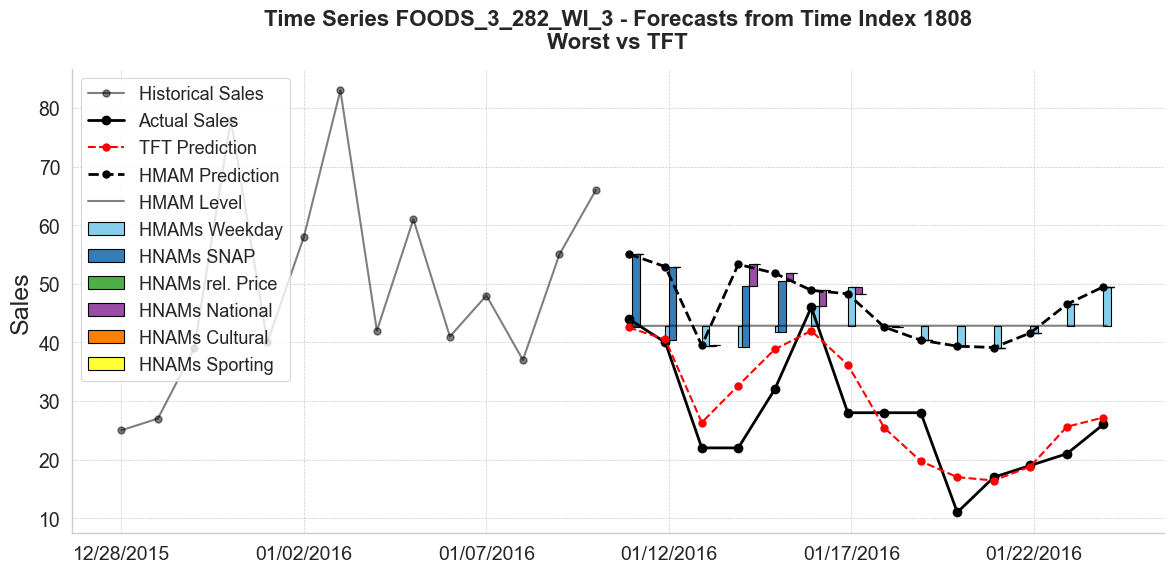

In [10]:


hnam_grouped = data_pred.groupby(['time_idx','time_series'])['srmse'].mean().sort_values()
tft_grouped = data_tft.groupby(['time_idx','time_series'])['srmse'].mean().sort_values()
relative = (hnam_grouped / tft_grouped).sort_values()
hnam_good = hnam_grouped.index[0]
hnam_bad = hnam_grouped.index[-1]
relative_good = relative.index[0]
relative_bad = relative.index[-1]
sns.set_theme(style='whitegrid', context='paper', font_scale=1.6)
fs_title = 16
fs_xticks = 15
fs_ylabel = 18
fs_xlabel = 18
fs_legend = 13
palette = sns.color_palette("Set1")


show_hist = 14
predcolor = palette[-2]


holiday_columns =  {'Favorita':['national_holiday','regional_holiday','local_holiday'],
                    'Walmart':['National', 'Cultural', 'Sporting']}.get(DATASET)

for sel,name in zip([many_effects,hnam_good,hnam_bad,relative_good,relative_bad],['Many Effects','Lowest sRMSE','Highest sRMSE','Best vs TFT','Worst vs TFT']):


    tix = sel[0]
    ts = sel[1]

    n_c = len(causals)

    # Filter data for the current time series and time index
    data_i = data_pred[
        (data_pred['time_series'] == ts) & (data_pred['time_idx'] == tix)
    ].set_index('pred_idx')

    # Extract predictions and sales
    pred = data_i['pred']
    pred_tft = data_tft[
        (data_tft['time_series'] == ts) & (data_tft['time_idx'] == tix)
    ].set_index('pred_idx')['pred']
    sales = data_i['sales']

    # Get historical sales data
    history = data[
        (data.time_series == ts) & (data.time_idx.between(tix - show_hist, tix - 1))
    ].set_index('time_idx')

    # Extract effects
    level = data_i['effect_level_pred']
    weekday = data_i['effect_weekday']

    current = level + weekday

    prev_effect = weekday

    h_offsets = np.zeros(len(prev_effect))

    # Create figure with adjusted size
    plt.figure(figsize=(12, 6))

    # Plot historical sales
    plt.plot(
        history.index,
        history['sales'].values,
        label='Historical Sales',
        marker='o',
        markersize=5,
        color='black',
        linestyle='-',
        linewidth=1.5,
        alpha=0.5
    )

    # Plot actual sales
    plt.plot(
        sales.index + h_offsets - 0.1,
        sales.values,
        label='Actual Sales',
        marker='o',
        markersize=6,
        color='black',
        linestyle='-',
        linewidth=2,
    )

    # Plot TFT predictions
    plt.plot(
        pred_tft.index + h_offsets - 0.1,
        pred_tft.values,
        label='TFT Prediction',
        marker='o',
        markersize=5,
        color='red',
        linestyle='--',
        linewidth=1.5,
    )

    # Plot HMAM predictions
    plt.plot(
        pred.index + h_offsets - 0.1,
        pred.values,
        label='HMAM Prediction',
        marker='o',
        markersize=5,
        color='black',
        linestyle='--',
        linewidth=2.0,
    )

    # Plot HMAM Level
    plt.plot(
        level.index,
        level.values,
        label='HMAM Level',
        color='black',
        alpha=0.5,
        linewidth=1.5,
    )

    # Plot HMAM Weekday effect as bars
    plt.bar(
        weekday.index,
        weekday.values,
        bottom=level.values,
        width=0.2,
        label='HMAMs Weekday',
        color='skyblue',
        edgecolor='black',
    )

    # Loop over causal effects and plot them
    for j in range(1, n_c):
        effect = data_i['effect_' + causals[j]]

        add_offset = np.sign(prev_effect).ne(np.sign(effect)).astype(int) * 0.1
        h_offsets += add_offset

        c_label = causals[j].capitalize()
        if c_label == 'Snap': c_label = 'SNAP'
        if c_label == 'Relprice': c_label = 'rel. Price'
        if c_label == 'Onpromotion': c_label = 'Promotion'
        if  c_label == 'National_holiday': c_label = 'National Holiday'
        if c_label == 'Regional_holiday': c_label = 'Regional Holiday'
        if c_label == 'Local_holiday': c_label = 'Local Holiday'

        label = f'HNAMs {c_label}'
        
        plt.bar(
            effect.index + h_offsets,
            effect.values,
            bottom=current.values,
            width=0.2,
            label=label,
            color=palette[j],
            edgecolor='black',
        )

        prev_effect = effect
        current += effect


    # get current x lim
    xlim1 = plt.gca().get_xlim()[0]
    xlim2 = plt.gca().get_xlim()[1]

    locs, labels = plt.xticks()
    new_labels = [ttod.get(int(l.get_text()),pd.to_datetime('2000-01-01')).strftime("%m/%d/%Y") for l in labels]
    plt.xticks(locs, new_labels,fontsize=14)
    plt.xlim(xlim1,xlim2)

    # Add title and labels
    plt.title(
        f'Time Series {ts} - Forecasts from Time Index {tix-1}\n{name}',
        fontsize=fs_title,
        fontweight='bold',
        pad=15,
    )
    # plt.xlabel('Date', fontsize=fs_xlabel)
    plt.ylabel('Sales', fontsize=fs_ylabel)

    # Customize legend
    # let legend have solid background color
    plt.legend(
        facecolor='white',
        title=None,
        title_fontsize=None,
        fontsize=fs_legend,
        loc='upper left',
        frameon=True
    )

    # Set grid and limits for clarity
    plt.grid(True, linestyle='--', linewidth=0.5)
    sns.despine()

    plt.tight_layout()
    name = name.replace(' ','_')
    plt.savefig(f'figures/local_instances/{DATASET.lower()}_local_{name}.tiff',dpi=350, bbox_inches='tight',pil_kwargs={"compression": "tiff_lzw"})
    plt.show()



## Horizon Sensitivity

In [11]:


effect_cols = [c for c in data_all.columns if 'effect' in c]   # all columns that store estimated forecast effect sizes
subset = data_all[effect_cols + ['time_idx','pred_idx','h','time_series','pred']] # time idx is the index of the first forecast, pred_idx is the index of the forecasted day, h is the forecast horizon, hence for h=1 time_idx equals pred_idx

subset_h1 = subset[subset['h'] == 1] # subset for horizon 1, supposedly the most informed and accurate forecast
subset_h1['sum_effects'] = subset_h1[effect_cols].abs().sum(axis=1) # sum of absolute effect sizes for each forecast
subset = subset.merge(subset_h1, on=['time_series','pred_idx'], how='left', suffixes=('', '_h1')).dropna() # merge the sum of effects for horizon 1 to the main dataframe

share_pred_cols = [c + '_share_pred' for c in effect_cols] # create new columns to store the share of each effect in the total effect size
subset[share_pred_cols] = subset[effect_cols].values / subset['sum_effects'].values[:, None] # calculate the share of each effect in the total effect size

pct_diff_cols = [c + '_pct_pred' for c in effect_cols]   # create new columns to store the percentage difference between the effect size and the effect size at horizon 1
subset[pct_diff_cols] = (subset[effect_cols].values / subset[[c + '_h1' for c in effect_cols]].values) - 1 # calculate the percentage difference
subset[pct_diff_cols] = subset[pct_diff_cols].values * subset[share_pred_cols].values # multiply the percentage difference by the share of the effect in the total effect size

for c in effect_cols:
    cn = c.split('_')[1]
    subset[f'stable_sign_{cn}'] = subset[c].gt(0) == subset[c+'_h1'].gt(0)
stable_cols = subset.columns[subset.columns.str.contains('stable_sign')]
mean_stable = subset[stable_cols].mean()
mean_stable

/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/1685073356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_h1['sum_effects'] = subset_h1[effect_cols].abs().sum(axis=1) # sum of absolute effect sizes for each forecast
/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/1685073356.py:12: RuntimeWarning: invalid value encountered in divide
  subset[pct_diff_cols] = (subset[effect_cols].values / subset[[c + '_h1' for c in effect_cols]].values) - 1 # calculate the percentage difference


stable_sign_level       0.999987
stable_sign_weekday     0.995659
stable_sign_snap        0.996853
stable_sign_National    0.994859
stable_sign_Cultural    0.997765
stable_sign_Sporting    0.998917
stable_sign_relprice    0.998775
dtype: float64

/var/folders/0f/01zw64517cqdsbtf53d86j7h0000gn/T/ipykernel_22330/1145708267.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_h1['sum_effects'] = subset_h1[effect_cols].abs().sum(axis=1)


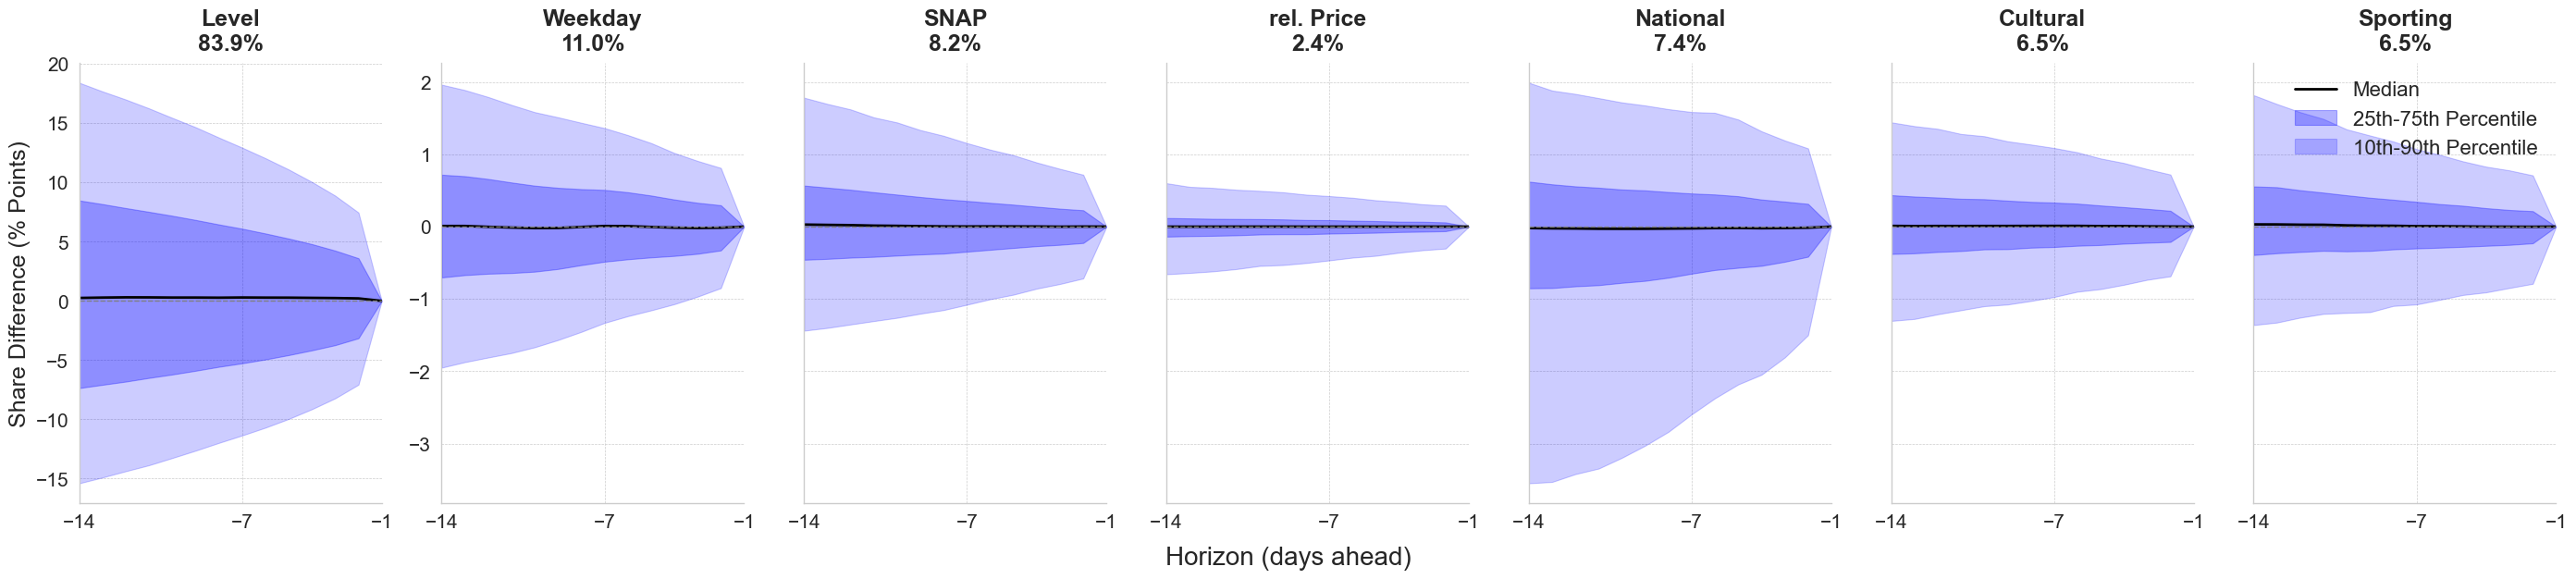

In [12]:
sns.set_theme(style='whitegrid', context='paper', font_scale=1.6)
fs_title = 18
fs_xticks = 15
fs_yticks = 15
fs_ylabel = 18
fs_xlabel = 20
fs_legend = 16

# columns in data_all containing effect
effect_cols = ['effect_level_pred'] + ['effect_'+c for c in causals]
subset = data_all[effect_cols + ['time_idx','pred_idx','h','time_series','pred']]
subset_h1 = subset[subset['h'] == 1]
subset_h1['sum_effects'] = subset_h1[effect_cols].abs().sum(axis=1)
subset = subset.merge(subset_h1, on=['time_series','pred_idx'], how='left', suffixes=('', '_h1')).dropna()

diff_cols = [c + 'diff' for c in effect_cols]
share_pred_cols = [c + '_share_pred' for c in effect_cols]
shares = subset[subset['h'] == 1][effect_cols].abs().div(subset['sum_effects'],axis=0)
avg_relevance = shares.replace(0,np.nan).mean()


subset[diff_cols] = subset[effect_cols].values - subset[[c + '_h1' for c in effect_cols]].replace(0,np.nan).values
subset[diff_cols] = subset[diff_cols].replace(0,np.nan)

subset[diff_cols] = subset[diff_cols].div(subset['effect_level_pred_h1'],axis=0)
ts,pix = subset.sort_values(diff_cols[0]).iloc[-1][['time_series','pred_idx']]

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
subset_a = subset.groupby('h')[diff_cols].quantile(quantiles).fillna(0).iloc[::-1].unstack()
subset_a.index = subset_a.index * -1


effect_cols = subset_a.columns.get_level_values(0).unique().tolist()

effect_cols = [col for col in effect_cols if col == 'effect_level_pred_pct_pred'] + \
              [col for col in effect_cols if col != 'effect_level_pred_pct_pred']

causal_covariates = [col.replace('effect_', '').replace('_pct_pred', '') for col in effect_cols]
effect_to_covariate = dict(zip(effect_cols, ['Level'] +causals))


sns.set_theme(style='whitegrid', context='paper', font_scale=1.2)
num_covariates = len(causal_covariates)

fig, axes = plt.subplots(
    nrows=1,
    ncols=num_covariates,
    figsize=(4 * num_covariates, 6),
    sharey=False
)

for i in range(1, num_covariates):
    axes[i].sharey(axes[1])

for i in range(2, num_covariates):
    axes[i].tick_params(labelleft=False)

if num_covariates == 1:
    axes = [axes]

level_data_values = []
other_data_values = []

for i, effect_col in enumerate(effect_cols):
    covariate_name = effect_to_covariate[effect_col].capitalize()
    covariate_name = {'Snap':'SNAP',
                      'Onpromotion':'Promotion','National_holiday':'National',
                      'Regional_holiday':'Regional','Local_holiday':'Local',
                      'Relprice':'rel. Price'}.get(covariate_name,covariate_name)

    ax = axes[i]

    covariate_data = subset_a[effect_col]
    covariate_data.index.name = 'Horizon'
    covariate_data = covariate_data.reset_index()
    covariate_data['Horizon'] = covariate_data['Horizon'].astype(int)
    covariate_data = covariate_data.sort_values('Horizon')

    for q in quantiles:
        covariate_data[q] = covariate_data[q] * 100

    ax.plot(covariate_data['Horizon'], covariate_data[0.5], color='black', linewidth=2, label='Median')
    ax.fill_between(covariate_data['Horizon'], covariate_data[0.25], covariate_data[0.75],
                    color='blue', alpha=0.3, label='25th-75th Percentile')
    ax.fill_between(covariate_data['Horizon'], covariate_data[0.1], covariate_data[0.9],
                    color='blue', alpha=0.2, label='10th-90th Percentile')

    relevance = avg_relevance[effect_col.split('diff')[0]]


    ax.set_title(f'{covariate_name}\n{relevance:.1%}', fontsize=fs_title, fontweight='bold', pad=10)

    ax.set_xlim(-np.abs(subset_a.index).max(), -1)
    ax.set_xlabel(None, fontsize=fs_xlabel)
    if i == 0:
        ax.set_ylabel('Share Difference (% Points)', fontsize=fs_ylabel)
    else:
        ax.set_ylabel('')

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)


    if i == num_covariates - 1:
        ax.legend(
            title=None,
            title_fontsize=13,
            fontsize=fs_legend,
            loc='upper right',
            frameon=False
        )
    else:
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()

    ax.grid(True, linestyle='--', linewidth=0.5)
    sns.despine(ax=ax)

    ax.tick_params(axis='y', which='both', labelsize=15, width=1.5)
    ax.set_xticks([-14,-7,-1])
    ax.tick_params(axis='x', which='both', labelsize=15, width=1.5)
    
    

    # Calculate y-limits individually for each plot
    data_values = covariate_data[quantiles].values.flatten()
    data_values = data_values[~np.isnan(data_values)]
    if len(data_values) > 0:
        y_min = np.min(data_values)
        y_max = np.max(data_values)
        y_margin = (y_max - y_min) * 0.1
        y_limits = (y_min - y_margin, y_max + y_margin)



# overall x label for all
fig.text(0.5, -0.03, 'Horizon (days ahead)', ha='center', fontsize=fs_xlabel)

plt.tight_layout()
plt.savefig(f'figures/global_robustness/{DATASET.lower()}_robustness_global.tiff', dpi=350, bbox_inches='tight',pil_kwargs={"compression": "tiff_lzw"})
plt.show()